# Visualisation et traitement statistique des données chimiques

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Inspiré de https://fxjollois.github.io/cours-2019-2020/lp-iot--python-ds/seance2-ACP-classif.html


## Upload du fichier excel de données

In [40]:
reliure_complet = pd.read_excel("C:/Projets/lemonegg/reliure_data.xlsx", sheet_name = "raw", header = 0, index_col=None)
print("Aperçu du DataFrame:")
reliure_complet.head(5)

Aperçu du DataFrame:


,Localisation,Zone mesurée,Couleur,Type de verre,Na2O,MgO,Al2O3,SiO2,P2O5,SO3,...,ZrO2,MoO3,Ag2O,SnO2,Sb2O5,BaO,Au2O3,HgO,PbO,Bi2O3
0,ange,manche,bleu foncé,translucide,3.890,0.404,2.902,78.038,0.152,0.509,...,0.011,0.000,0.011,0.029,0.627,0.039,0.024,0.000,0.010,0.000
1,lion,nimbe,bleu foncé,translucide,4.063,0.428,2.960,77.544,0.353,0.457,...,0.010,0.004,0.013,0.030,0.407,0.028,0.010,0.001,0.022,0.001
2,taureau,aile,bleu foncé,translucide,3.815,0.423,2.674,78.147,0.327,0.501,...,0.008,0.002,0.149,0.028,0.000,0.032,0.035,0.001,0.016,0.000
3,aigle,tete,bleu foncé,translucide,3.900,0.415,2.535,78.277,0.412,0.498,...,0.007,0.002,0.015,0.000,0.269,0.040,0.024,0.001,0.034,0.000
4,aigle,tete,bleu foncé,translucide,3.839,0.389,2.521,77.819,0.326,0.437,...,0.008,0.000,0.013,0.020,0.775,0.040,0.023,0.001,0.028,0.000


## Standardisation des données pour PCA

On sélectionne uniquement les colonnes numériques correspondant aux éléments chimiques

In [41]:
reliure_num = reliure_complet.drop(columns = ["Localisation","Zone mesurée","Couleur","Type de verre"])
print("\nColonnes des éléments chimiques utilisées pour la PCA:")
reliure_num.head(5)


Colonnes des éléments chimiques utilisées pour la PCA:


,Na2O,MgO,Al2O3,SiO2,P2O5,SO3,Cl,K2O,CaO,TiO2,...,ZrO2,MoO3,Ag2O,SnO2,Sb2O5,BaO,Au2O3,HgO,PbO,Bi2O3
0,3.890,0.404,2.902,78.038,0.152,0.509,1.156,0.925,7.738,0.093,...,0.011,0.000,0.011,0.029,0.627,0.039,0.024,0.000,0.010,0.000
1,4.063,0.428,2.960,77.544,0.353,0.457,1.193,0.945,7.871,0.093,...,0.010,0.004,0.013,0.030,0.407,0.028,0.010,0.001,0.022,0.001
2,3.815,0.423,2.674,78.147,0.327,0.501,1.229,0.957,7.962,0.089,...,0.008,0.002,0.149,0.028,0.000,0.032,0.035,0.001,0.016,0.000
3,3.900,0.415,2.535,78.277,0.412,0.498,1.214,0.886,7.978,0.091,...,0.007,0.002,0.015,0.000,0.269,0.040,0.024,0.001,0.034,0.000
4,3.839,0.389,2.521,77.819,0.326,0.437,1.242,0.829,8.031,0.094,...,0.008,0.000,0.013,0.020,0.775,0.040,0.023,0.001,0.028,0.000


On effectue la standardisation soit le centrage (soustration de la moyenne de chaque variable) puis la réduction (division de chaque variable par son écart-type) des données avec la fonction StandardScaler(). Le but est d'obtenir une moyenne nulle et un écart-type égal à 1 pour chaque variable. Cela garantit que chaque variable contribue de manière équitable à l'analyse sans qu'une variable à forte variance ne domine les résultats de la PCA.

In [42]:
scaler = StandardScaler()
reliure_num_norm = scaler.fit_transform(reliure_num)

## Calcul de la PCA

In [43]:
pca = PCA()
pca.fit(reliure_num_norm)
#resultat_pca = pca.fit_transform(colonnes_elements_standardisees)

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.n_components_)

[8.74076479e+00 7.18016034e+00 3.89889568e+00 2.59909984e+00
 2.33769941e+00 1.75356063e+00 1.48388445e+00 1.33124011e+00
 9.46388343e-01 9.28976278e-01 7.95211527e-01 5.20883145e-01
 4.06782457e-01 3.59701008e-01 2.60426012e-01 2.00744432e-01
 1.78334790e-01 1.48249835e-01 1.14859357e-01 9.76963270e-02
 8.98467034e-02 7.86965062e-02 6.38743419e-02 4.41859596e-02
 3.24949660e-02 2.26373289e-02 2.12953212e-02 1.42231252e-02
 1.14383841e-02 7.54414508e-03 4.75561666e-03 3.21836189e-03
 2.22097763e-03 9.50076598e-06]
[2.52040507e-01 2.07040379e-01 1.12424904e-01 7.49452087e-02
 6.74077107e-02 5.05640321e-02 4.27879021e-02 3.83863930e-02
 2.72891679e-02 2.67870899e-02 2.29299748e-02 1.50196985e-02
 1.17295980e-02 1.03720014e-02 7.50940056e-03 5.78847843e-03
 5.14229499e-03 4.27479339e-03 3.31197684e-03 2.81707979e-03
 2.59073539e-03 2.26921875e-03 1.84182070e-03 1.27410495e-03
 9.36994405e-04 6.52748816e-04 6.14051938e-04 4.10124716e-04
 3.29826532e-04 2.17535902e-04 1.37128508e-04 9.28016

### Variance expliquée 
On fait un tableau récapitulatif avec les variances expliquées et le ratio de variance expliquée par dimension.

In [44]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(pca.n_components_)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)

eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,8.740765,25.0,25.0
1,Dim2,7.180160,21.0,46.0
2,Dim3,3.898896,11.0,57.0
3,Dim4,2.599100,7.0,65.0
4,Dim5,2.337699,7.0,71.0
5,Dim6,1.753561,5.0,76.0
6,Dim7,1.483884,4.0,81.0
7,Dim8,1.331240,4.0,85.0
8,Dim9,0.946388,3.0,87.0
9,Dim10,0.928976,3.0,90.0


On représente graphiquement les proportions de variance expliquée

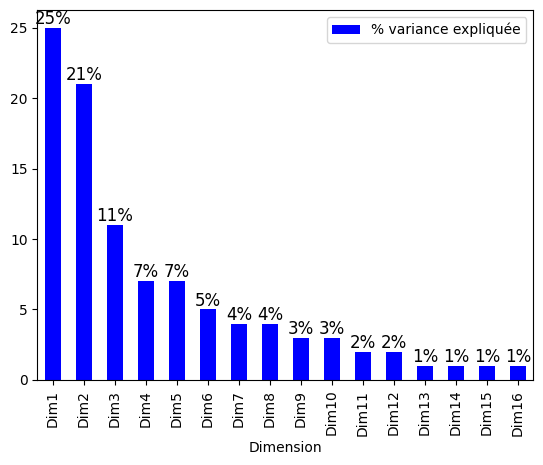

In [45]:
# On choisit un subset du tableau avec des valeurs non nulles
eig_subset = eig.iloc[:16] 
ax = eig_subset.plot.bar(x="Dimension", y="% variance expliquée", color="blue")
# Parcourir chaque barre (patch) pour annoter sa valeur
for p in ax.patches:
    # p.get_height() correspond à la hauteur de la barre (la valeur y)
    ax.annotate(f'{p.get_height():.0f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12)
plt.show()


## Représentation des individus
Nous allons maintenant calculer les coordonnées des individus sur les dimensions avec la fonction transform() de l'objet pca

In [46]:
reliure_pca = pca.transform(reliure_num_norm)

# On crée un dataframe avec le nombre de colonnes = le nombre de composantes obtenues par la PCA
reliure_pca_df = pd.DataFrame(reliure_pca, columns = [f"Dim{i+1}" for i in range(reliure_pca.shape[1])])
reliure_pca_df["Localisation"] = reliure_complet["Localisation"]
reliure_pca_df["Couleur"] = reliure_complet["Couleur"]

reliure_pca_df.head(10)


,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Dim9,Dim10,...,Dim27,Dim28,Dim29,Dim30,Dim31,Dim32,Dim33,Dim34,Localisation,Couleur
0,-2.274508,-1.633692,-0.251528,0.649170,-0.239185,-0.084584,-1.287226,0.617066,0.968126,-0.108786,...,0.046972,0.022044,-0.069050,0.094060,-0.119423,-0.007398,0.100604,-0.003801,ange,bleu foncé
1,-1.775710,-1.301095,-0.096566,1.268925,-0.369334,0.098153,-1.380425,0.623944,0.797721,0.054583,...,-0.019677,0.191026,-0.107873,-0.004008,0.097343,-0.045932,0.023808,0.006432,lion,bleu foncé
2,-1.564333,-1.486616,-0.271304,0.261684,1.153523,0.836429,-1.077750,1.880313,-0.181763,1.402154,...,0.167388,-0.074931,0.100316,0.026473,0.024324,0.001394,0.022365,0.000862,taureau,bleu foncé
3,-1.767746,-1.233743,-0.369406,1.174688,-0.171499,-0.233625,-1.623992,0.854359,-0.130310,0.150018,...,0.193501,0.116154,0.045667,0.092329,0.054114,0.011492,-0.038336,-0.004314,aigle,bleu foncé
4,-1.749990,-1.045236,-0.119695,1.161769,0.068843,0.277984,-1.454434,0.832433,-0.552753,0.113307,...,0.066915,-0.210119,0.054879,-0.036675,-0.065294,0.079331,0.037105,0.001478,aigle,bleu foncé
5,-1.118461,-1.089245,-0.916777,0.067688,0.701404,-0.769480,-0.329835,-0.424623,0.265381,1.048121,...,0.097141,0.100953,-0.065269,0.020075,-0.144909,0.030850,-0.110508,-0.000532,bandeau droite,bleu foncé
6,-1.596060,-1.790533,-0.949492,-0.179346,1.058995,-0.163277,0.441554,1.387932,1.048540,1.062491,...,-0.350859,-0.009634,-0.148047,-0.046744,-0.060419,-0.028725,-0.028959,0.001883,bandeau droite,bleu foncé
7,-1.380312,-1.151975,0.309337,0.192569,0.630906,-0.752032,-0.946124,0.164004,0.939167,0.352385,...,-0.229177,0.085907,-0.075705,-0.070597,-0.039341,-0.014167,-0.023184,-0.003027,bandeau gauche,bleu foncé
8,-1.466655,-1.763790,-1.827391,-0.251221,0.806112,-2.026483,1.849831,-0.607783,0.765997,-0.349541,...,-0.020143,-0.064446,0.050250,0.030153,0.047088,-0.071956,0.010736,-0.001605,ange,blanc bleuté
9,-1.721151,-2.004111,-2.271821,-0.426980,0.211344,0.707046,0.479495,0.252032,0.636673,0.143826,...,-0.071477,-0.201006,0.123087,-0.018368,0.042597,-0.011973,-0.007535,0.000906,ange,bleu moyen


Il est maintenant possible de représenter les données sur le premier plan factoriel. Dans ce graphique, il est important de noter le pourcentage de variance expliquée.

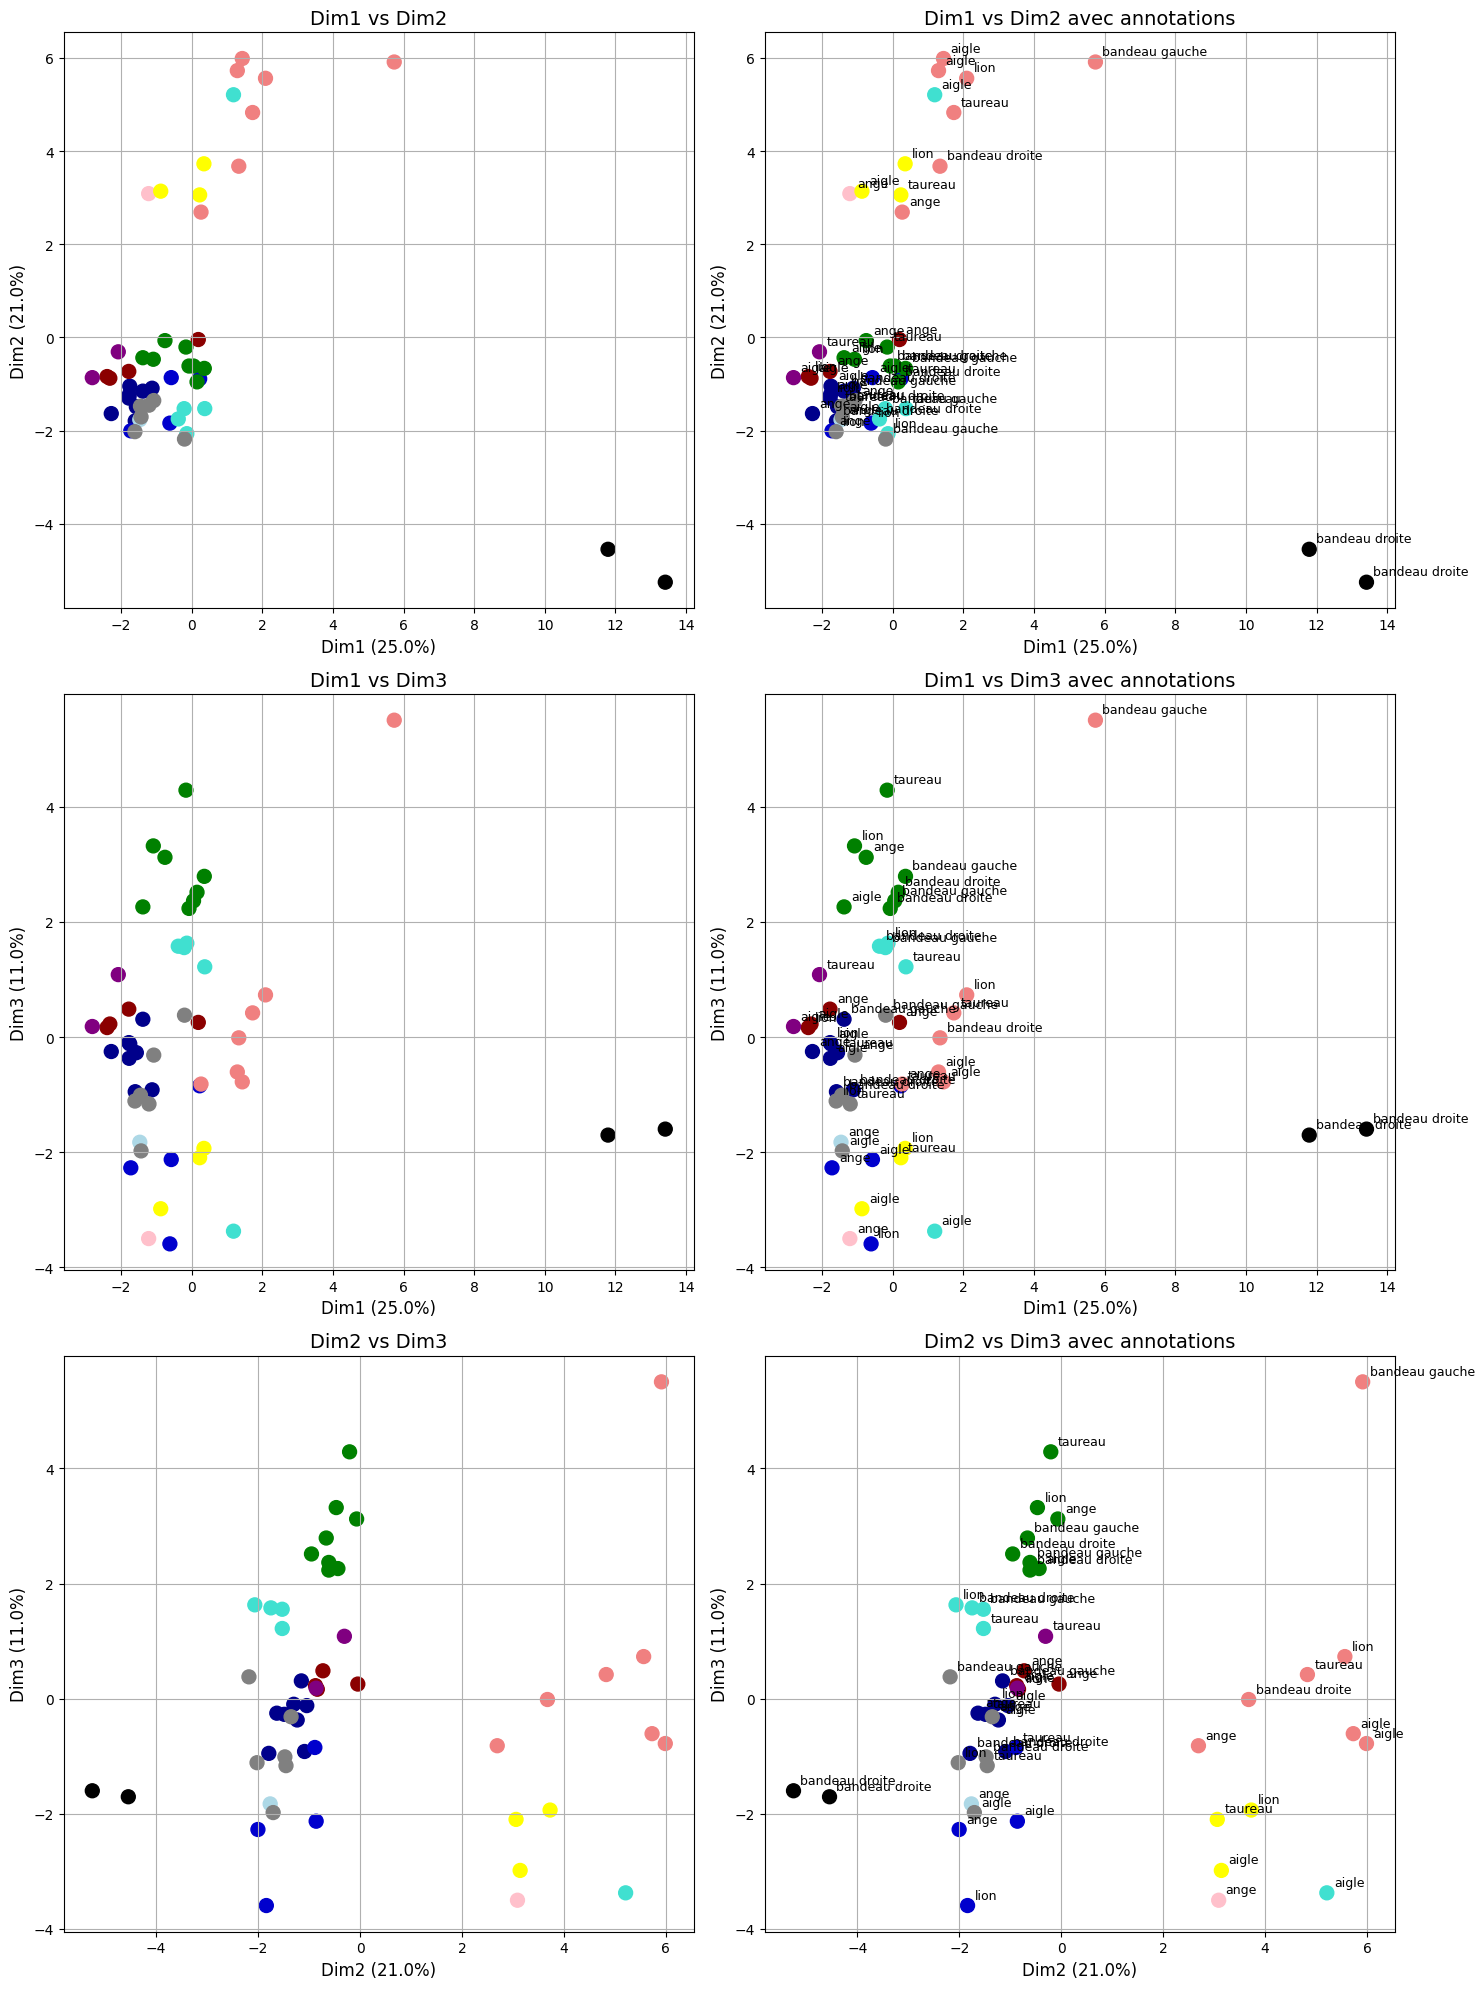

In [47]:
# --- Dictionnaire de correspondance pour les couleurs ---

color_mapping = {
    "bleu foncé": "darkblue",
    "blanc bleuté": "lightblue",
    "bleu moyen": "mediumblue",
    "bleu turquoise": "turquoise",
    "vert": "green",
    "rouge foncé": "darkred",
    "violet": "purple",
    "rouge clair": "lightcoral",
    "rose": "pink",
    "blanc": "grey",
    "jaune": "yellow",
    "brun": "black" 
}
reliure_pca_df["ColorMapped"] = reliure_pca_df["Couleur"].map(color_mapping)

# Récupérer automatiquement les labels pour Dim1, Dim2 et Dim3
dim1_label = f"Dim1 ({eig.loc[eig['Dimension']=='Dim1', '% variance expliquée'].values[0]}%)"
dim2_label = f"Dim2 ({eig.loc[eig['Dimension']=='Dim2', '% variance expliquée'].values[0]}%)"
dim3_label = f"Dim3 ({eig.loc[eig['Dimension']=='Dim3', '% variance expliquée'].values[0]}%)"

# --- Création de la grille 3 lignes x 2 colonnes pour les 6 graphiques ---
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))

# ---------- Ligne 1 : Dim1 vs Dim2 ----------
# Gauche : sans annotations
axs[0, 0].scatter(reliure_pca_df["Dim1"], reliure_pca_df["Dim2"],
                  c=reliure_pca_df["ColorMapped"], s=100)
axs[0, 0].set_xlabel(dim1_label, fontsize=12)
axs[0, 0].set_ylabel(dim2_label, fontsize=12)
axs[0, 0].set_title("Dim1 vs Dim2", fontsize=14)
axs[0, 0].grid(True)

# Droite : avec annotations
axs[0, 1].scatter(reliure_pca_df["Dim1"], reliure_pca_df["Dim2"],
                  c=reliure_pca_df["ColorMapped"], s=100)
for index, row in reliure_pca_df.iterrows():
    # Vous pouvez adapter la condition d'annotation selon vos critères
    if (abs(row["Dim1"]) > 5) or (abs(row["Dim2"]) > 0):
        axs[0, 1].annotate(row["Localisation"],
                           (row["Dim1"], row["Dim2"]),
                           fontsize=9,
                           textcoords="offset points",
                           xytext=(5, 5))
axs[0, 1].set_xlabel(dim1_label, fontsize=12)
axs[0, 1].set_ylabel(dim2_label, fontsize=12)
axs[0, 1].set_title("Dim1 vs Dim2 avec annotations", fontsize=14)
axs[0, 1].grid(True)

# ---------- Ligne 2 : Dim1 vs Dim3 ----------
# Gauche : sans annotations
axs[1, 0].scatter(reliure_pca_df["Dim1"], reliure_pca_df["Dim3"],
                  c=reliure_pca_df["ColorMapped"], s=100)
axs[1, 0].set_xlabel(dim1_label, fontsize=12)
axs[1, 0].set_ylabel(dim3_label, fontsize=12)
axs[1, 0].set_title("Dim1 vs Dim3", fontsize=14)
axs[1, 0].grid(True)

# Droite : avec annotations
axs[1, 1].scatter(reliure_pca_df["Dim1"], reliure_pca_df["Dim3"],
                  c=reliure_pca_df["ColorMapped"], s=100)
for index, row in reliure_pca_df.iterrows():
    if (abs(row["Dim1"]) > 5) or (abs(row["Dim3"]) > 0):
        axs[1, 1].annotate(row["Localisation"],
                           (row["Dim1"], row["Dim3"]),
                           fontsize=9,
                           textcoords="offset points",
                           xytext=(5, 5))
axs[1, 1].set_xlabel(dim1_label, fontsize=12)
axs[1, 1].set_ylabel(dim3_label, fontsize=12)
axs[1, 1].set_title("Dim1 vs Dim3 avec annotations", fontsize=14)
axs[1, 1].grid(True)

# ---------- Ligne 3 : Dim2 vs Dim3 ----------
# Gauche : sans annotations
axs[2, 0].scatter(reliure_pca_df["Dim2"], reliure_pca_df["Dim3"],
                  c=reliure_pca_df["ColorMapped"], s=100)
axs[2, 0].set_xlabel(dim2_label, fontsize=12)
axs[2, 0].set_ylabel(dim3_label, fontsize=12)
axs[2, 0].set_title("Dim2 vs Dim3", fontsize=14)
axs[2, 0].grid(True)

# Droite : avec annotations
axs[2, 1].scatter(reliure_pca_df["Dim2"], reliure_pca_df["Dim3"],
                  c=reliure_pca_df["ColorMapped"], s=100)
for index, row in reliure_pca_df.iterrows():
    if (abs(row["Dim2"]) > 5) or (abs(row["Dim3"]) > 0):
        axs[2, 1].annotate(row["Localisation"],
                           (row["Dim2"], row["Dim3"]),
                           fontsize=9,
                           textcoords="offset points",
                           xytext=(5, 5))
axs[2, 1].set_xlabel(dim2_label, fontsize=12)
axs[2, 1].set_ylabel(dim3_label, fontsize=12)
axs[2, 1].set_title("Dim2 vs Dim3 avec annotations", fontsize=14)
axs[2, 1].grid(True)

plt.tight_layout()
plt.show()



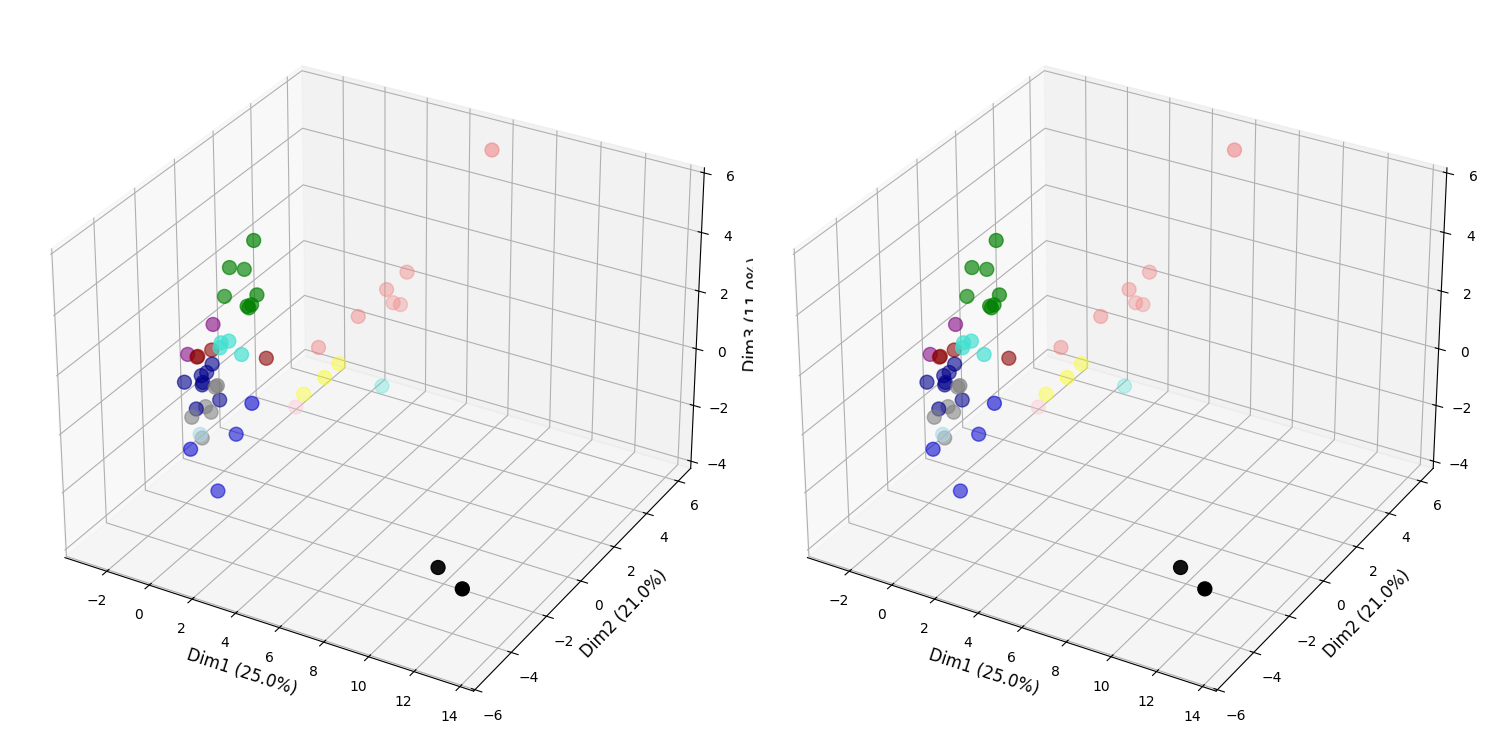

In [48]:
# --- Création de la grille 1 lignes x 2 colonnes pour les 2 graphiques ---
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 20), subplot_kw={'projection': "3d"})

# ---------- Ligne 1 : Dim1 vs Dim2 ----------
# Gauche : sans annotations
axs[0].scatter(reliure_pca_df["Dim1"], reliure_pca_df["Dim2"], reliure_pca_df["Dim3"],
                  c=reliure_pca_df["ColorMapped"], s=100)
axs[0].set_xlabel(dim1_label, fontsize=12)
axs[0].set_ylabel(dim2_label, fontsize=12)
axs[0].set_zlabel(dim3_label, fontsize=12)
axs[0].grid(True)

# Droite : avec annotations
axs[1].scatter(reliure_pca_df["Dim1"], reliure_pca_df["Dim2"], reliure_pca_df["Dim3"],
                  c=reliure_pca_df["ColorMapped"], s=100)
for index, row in reliure_pca_df.iterrows():
    # Vous pouvez adapter la condition d'annotation selon vos critères
    if (abs(row["Dim1"]) > 5) or (abs(row["Dim2"]) > 0):
        axs[1].annotate(row["Localisation"],
                           (row["Dim1"], row["Dim2"]),
                           fontsize=9,
                           textcoords="offset points",
                           xytext=(5, 5))
axs[1].set_xlabel(dim1_label, fontsize=12)
axs[1].set_ylabel(dim2_label, fontsize=12)
axs[0].set_zlabel(dim3_label, fontsize=12)
axs[1].grid(True)

plt.tight_layout()
plt.show()


## Représentation des variables 

In [49]:
n=reliure_num.shape[0] # nombre d'individus
p=reliure_num.shape[1] # nombre de variables
n
eigval = (n-1)/n*pca.explained_variance_ #valeurs propres
sqrt_eigval = np.sqrt(eigval) # racine carré des valeurs propres
n_components = pca.components_.shape[0]  # ou simplement len(sqrt_eigval)

corvar = np.zeros((p, n_components)) # attention à l'orientation
for k in range(n_components):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': reliure_num.columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})
coordvar.head(3)

,id,COR_1,COR_2
0,Na2O,-0.048775,-0.795499
1,MgO,0.192381,0.206177
2,Al2O3,-0.362448,0.425581


On peut ensuite afficher le cercle des corrélations

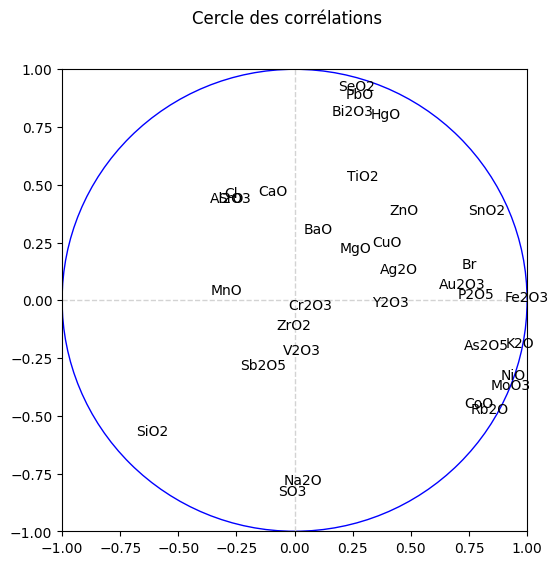

In [50]:
# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize = (6,6))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# Ajout des noms des variables
for j in range(p):
    axes.text(coordvar["COR_1"][j],coordvar["COR_2"][j], coordvar["id"][j])
# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))
plt.show()



## Classification k-means

Nous allons l'appliquer avec 2 et 3 classes afin de voir quelle partition serait la plus intéressante.
On peut avoir ainsi les classes de chaque individus (qui nous servent ici à calculer la taille de chaque classe), ainsi que les centres des classes.
L'algorithme k-means nous permet d'avoir à la fin l'inertie intra-classes, qui représente la disparité des individus à l'intérieur des classes. Plus cette valeur est proche de 0, meilleur est la partition. Malheureusement, la meilleure partition selon ce critère est donc celle avec autant de classes que d'individus. On va donc chercher un point d'inflexion dans la courbe d'évolution de ce critère. Voici comment faire pour avoir ce graphique. Et ici, le point le plus marquant est celui à 2 classes. Ensuite, celui à 3 classes peut montrer aussi une certaine cassure dans l'évolution du critère.

In [51]:
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters = 2)
kmeans2.fit(reliure_num)
print(pd.Series(kmeans2.labels_).value_counts())
#kmeans2.cluster_centers_
reliure_k2 = reliure_num.assign(classe = kmeans2.labels_)
reliure_k2.groupby("classe").mean()

1    37
0    14
Name: count, dtype: int64


,Na2O,MgO,Al2O3,SiO2,P2O5,SO3,Cl,K2O,CaO,TiO2,...,ZrO2,MoO3,Ag2O,SnO2,Sb2O5,BaO,Au2O3,HgO,PbO,Bi2O3
classe,,,,,,,,,,,,,,,,,,,,,
0,2.265286,1.014929,3.013500,61.690714,0.746500,0.132071,0.982286,2.826714,8.503000,0.212643,...,0.006000,0.006786,0.084857,0.667929,0.674286,0.059429,0.059857,0.003857,10.528429,0.007357
1,4.246838,0.852081,2.981703,73.406054,0.394784,0.757973,0.982081,1.387892,7.654649,0.153459,...,0.011081,0.001730,0.058027,0.107297,2.671730,0.046378,0.039162,0.000946,0.468486,0.000730


In [52]:
kmeans3 = KMeans(n_clusters = 3)
kmeans3.fit(reliure_num)
print(pd.Series(kmeans3.labels_).value_counts())
reliure_k3 = reliure_num.assign(classe = kmeans3.labels_)
reliure_k3.groupby("classe").mean()

0    22
2    15
1    14
Name: count, dtype: int64


,Na2O,MgO,Al2O3,SiO2,P2O5,SO3,Cl,K2O,CaO,TiO2,...,ZrO2,MoO3,Ag2O,SnO2,Sb2O5,BaO,Au2O3,HgO,PbO,Bi2O3
classe,,,,,,,,,,,,,,,,,,,,,
0,4.426818,1.088455,3.005955,71.128455,0.475409,0.847455,0.926182,1.538182,7.395727,0.182818,...,0.012227,0.001591,0.067364,0.150864,3.916318,0.056182,0.044364,0.001000,0.646818,0.000818
1,2.265286,1.014929,3.013500,61.690714,0.746500,0.132071,0.982286,2.826714,8.503000,0.212643,...,0.006000,0.006786,0.084857,0.667929,0.674286,0.059429,0.059857,0.003857,10.528429,0.007357
2,3.982867,0.505400,2.946133,76.746533,0.276533,0.626733,1.064067,1.167467,8.034400,0.110400,...,0.009400,0.001933,0.044333,0.043400,0.846333,0.032000,0.031533,0.000867,0.206933,0.000600


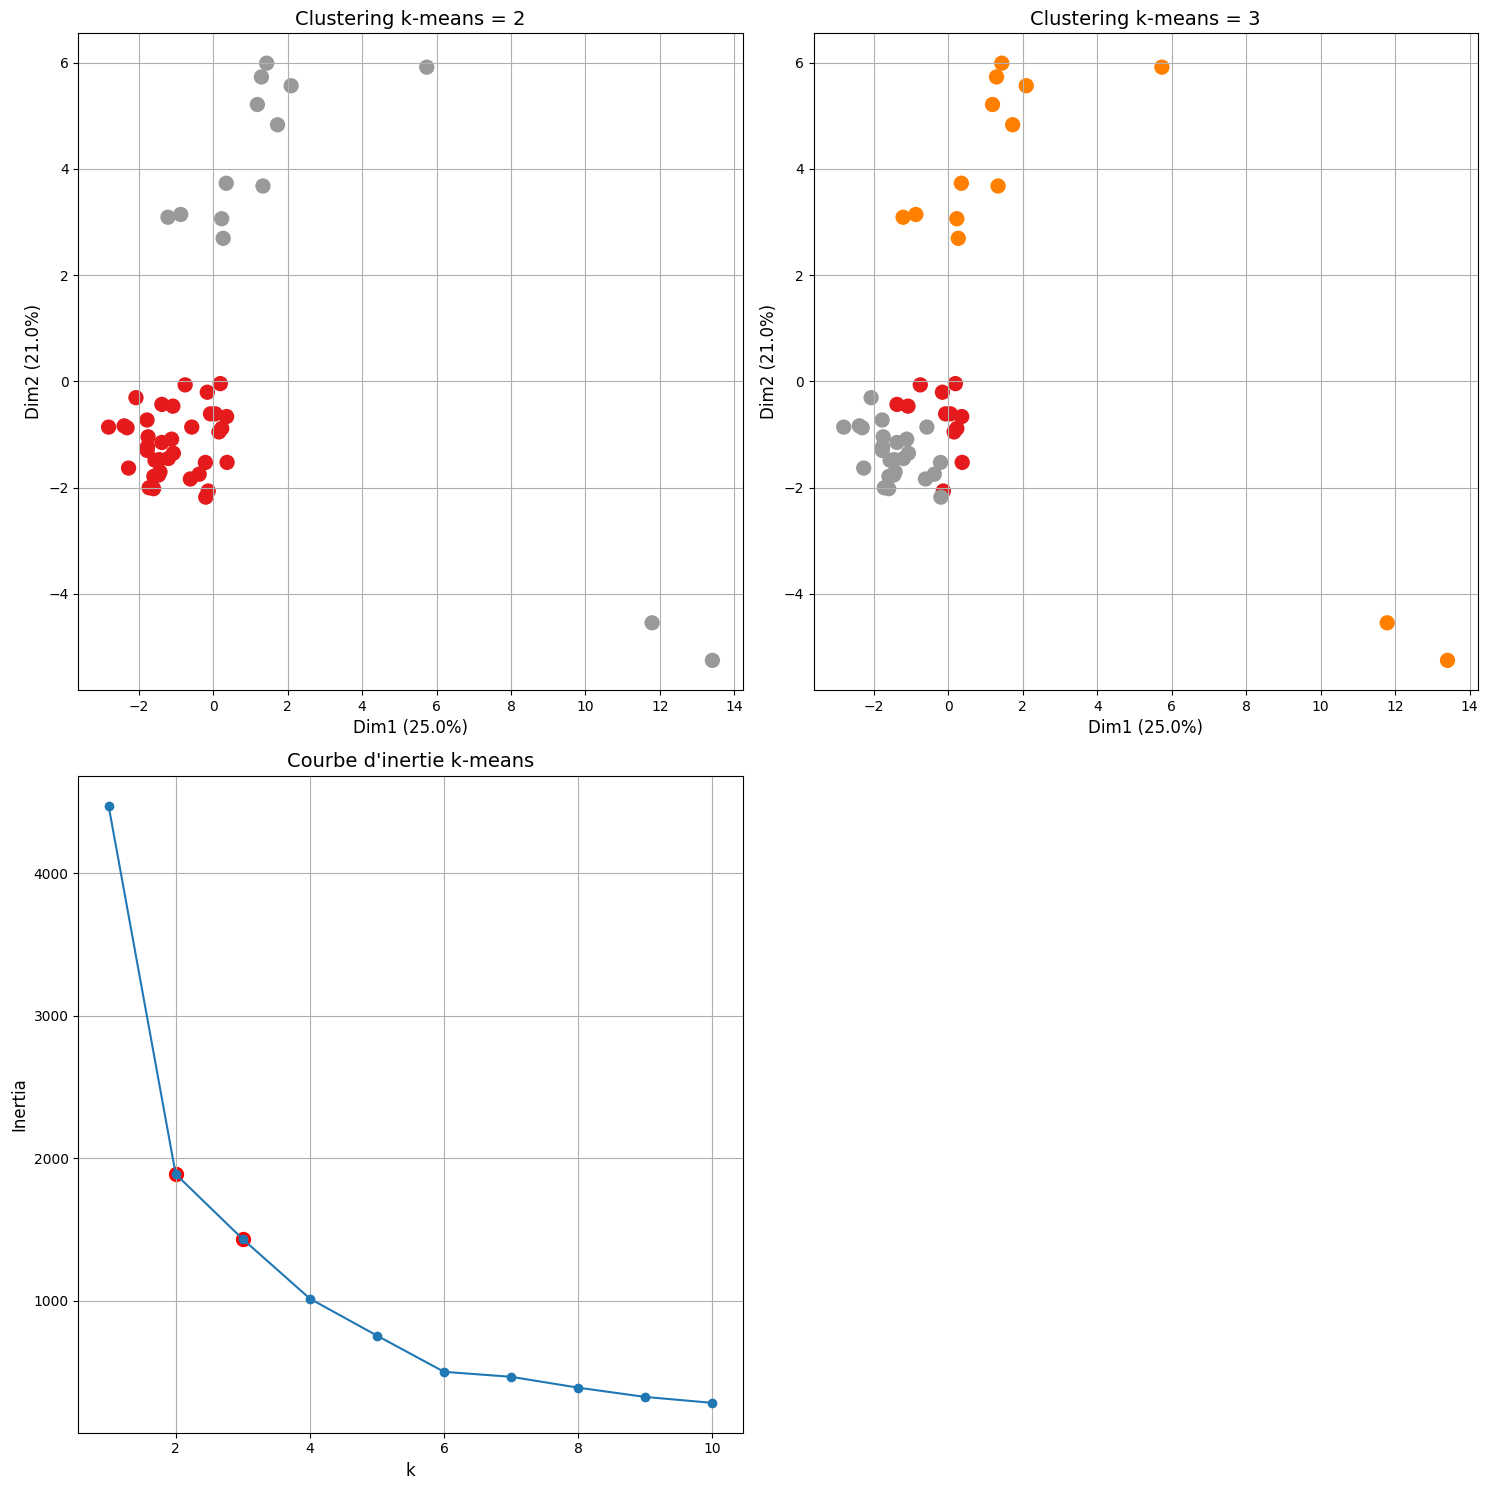

In [53]:
# --- Création de la grille 2x2 ---
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

# ---------- Top-Left : Clustering k-means avec 2 groupes ----------
kmeans2 = KMeans(n_clusters=2, random_state=42)
kmeans2.fit(reliure_num)
# On assigne les labels au DataFrame PCA
reliure_pca_k2 = reliure_pca_df.assign(classe=kmeans2.labels_)
axs[0, 0].scatter(reliure_pca_k2["Dim1"], reliure_pca_k2["Dim2"],
                  c=reliure_pca_k2["classe"], cmap="Set1", s=100)
axs[0, 0].set_xlabel(dim1_label, fontsize=12)
axs[0, 0].set_ylabel(dim2_label, fontsize=12)
axs[0, 0].set_title("Clustering k-means = 2", fontsize=14)
axs[0, 0].grid(True)

# ---------- Top-Right : Clustering k-means avec 3 groupes ----------
kmeans3 = KMeans(n_clusters=3, random_state=42)
kmeans3.fit(reliure_num)
reliure_pca_k3 = reliure_pca_df.assign(classe=kmeans3.labels_)
axs[0, 1].scatter(reliure_pca_k3["Dim1"], reliure_pca_k3["Dim2"],
                  c=reliure_pca_k3["classe"], cmap="Set1", s=100)
axs[0, 1].set_xlabel(dim1_label, fontsize=12)
axs[0, 1].set_ylabel(dim2_label, fontsize=12)
axs[0, 1].set_title("Clustering k-means = 3", fontsize=14)
axs[0, 1].grid(True)

# ---------- Bottom-Left : Courbe d'inertie pour k = 1 à 10 ----------
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, init="random", n_init=20, random_state=42).fit(reliure_num)
    inertia.append(km.inertia_)
inertia_df = pd.DataFrame({"k": range(1, 11), "inertia": inertia})
axs[1, 0].plot(inertia_df["k"], inertia_df["inertia"], marker="o", linestyle="-")
# Mettre en évidence k = 2 et k = 3
axs[1, 0].scatter(2, inertia_df[inertia_df["k"] == 2]["inertia"], c="red", s=100)
axs[1, 0].scatter(3, inertia_df[inertia_df["k"] == 3]["inertia"], c="red", s=100)
axs[1, 0].set_xlabel("k", fontsize=12)
axs[1, 0].set_ylabel("Inertia", fontsize=12)
axs[1, 0].set_title("Courbe d'inertie k-means", fontsize=14)
axs[1, 0].grid(True)

# ---------- Bottom-Right : Panneau vide ----------
axs[1, 1].axis("off")

plt.tight_layout()
plt.show()